# Movie Review Analysis Project
## Overview

Explore datasets containing Fandango and additional movie sites that provide movie ratings; gain insight in movie rating bias commited by Fandango.


### Goal:

**Showcase Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

---
---




----



----


### The Data

    Two csv files:  
   - First file: Fandango Stars and Displayed Ratings
   - Second file: Aggregate data containing ratings from Metacritic, Metacritic Users, IMDB, 
        IMDB Users, Rotten Tomatoes Critics, Rotten Tomatoes Users



-----
---

All_sites Table: contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----



Fandango Table: contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango Displayed Scores versus True Ratings
---

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### **The relationship between popularity of a film and its rating**

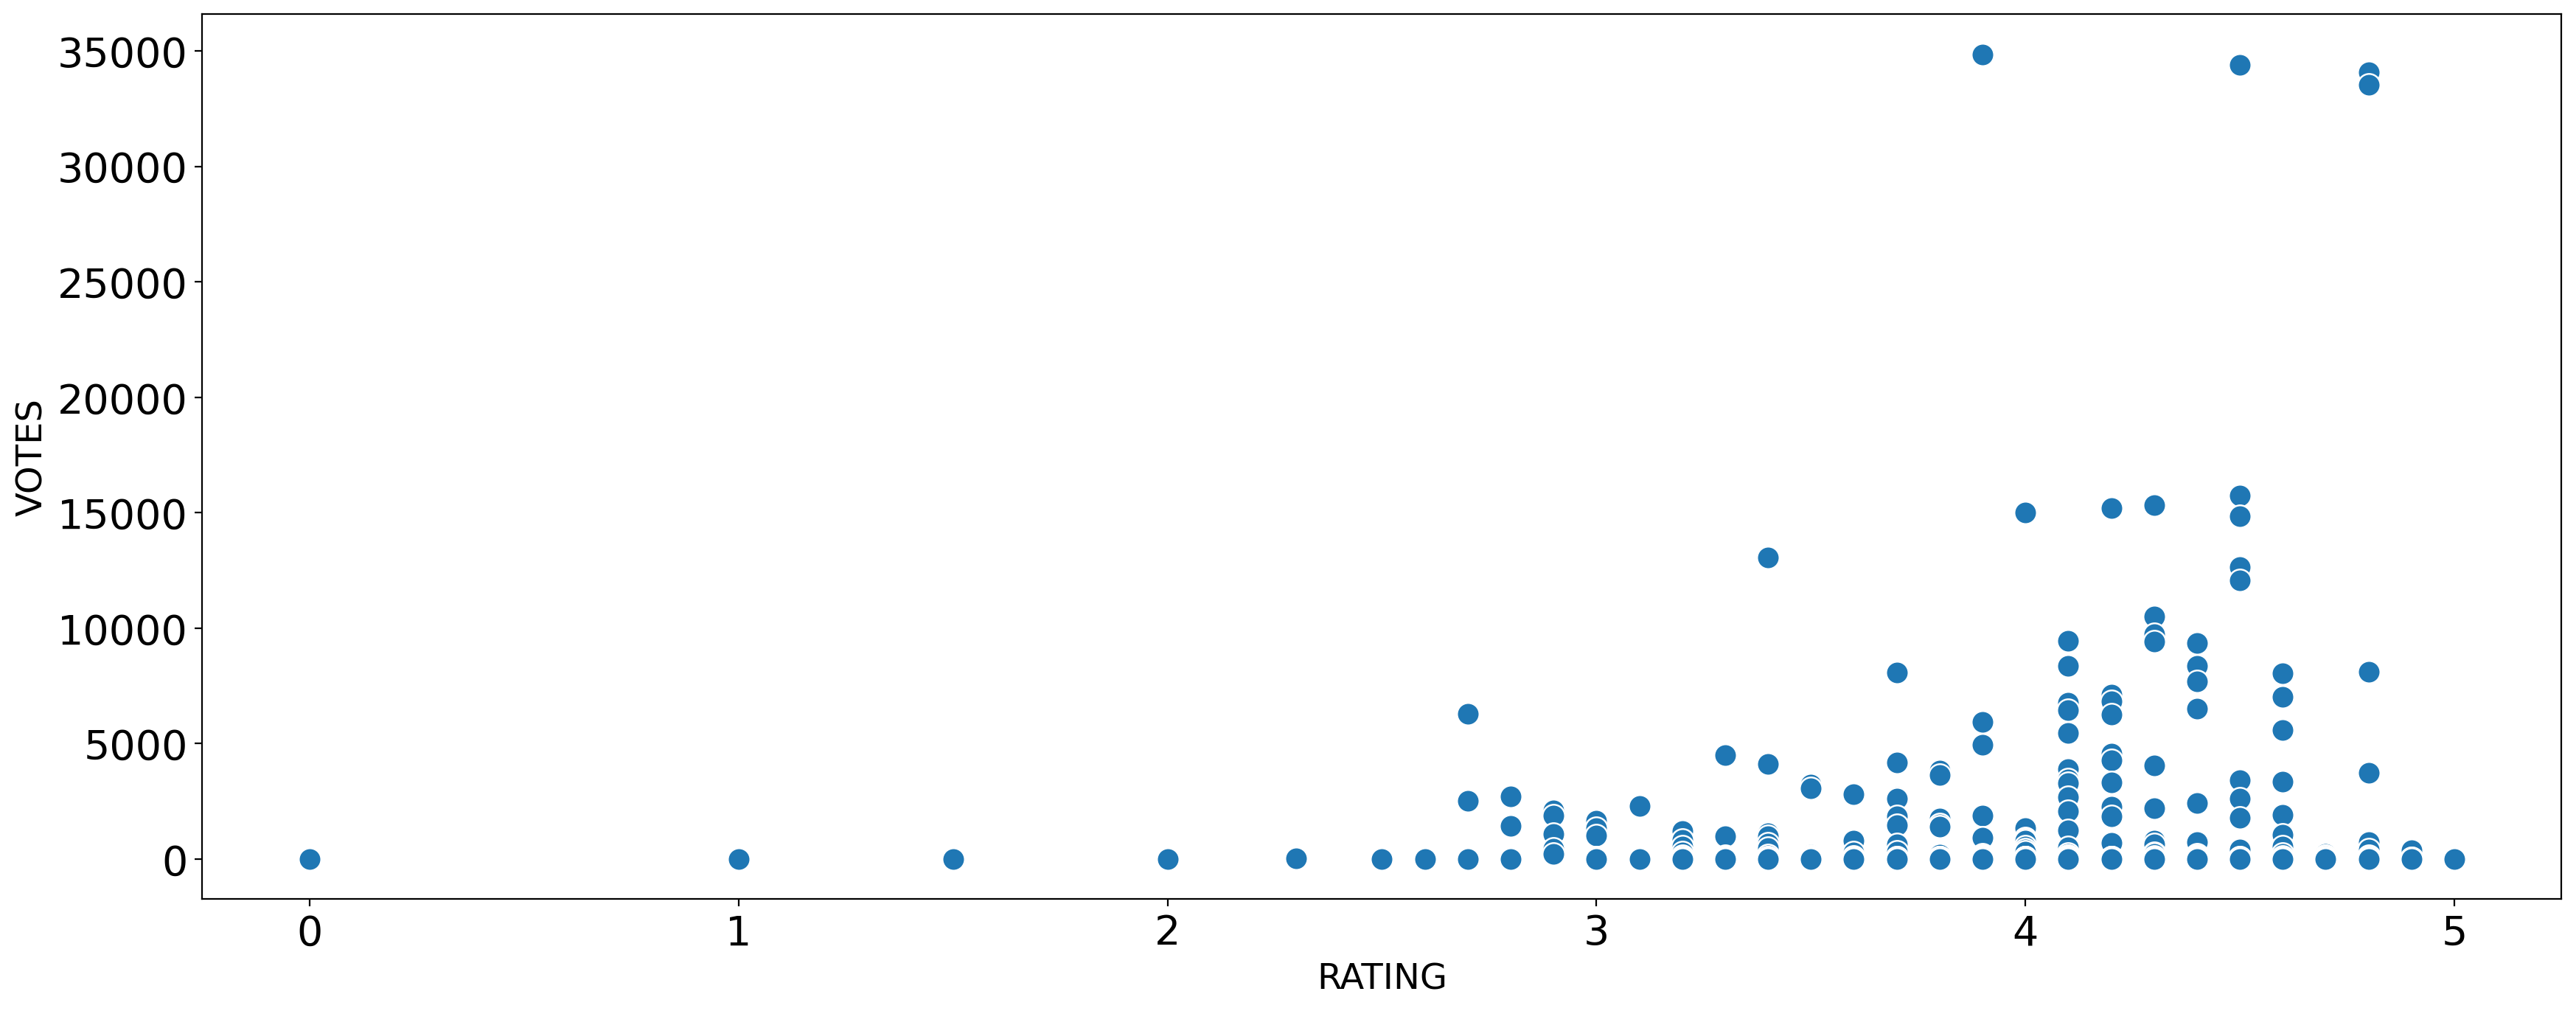

In [30]:
figure = plt.figure(figsize = (16,6), dpi = 200)
axes = figure.add_axes([0,0,1,1])

#plt.title('Test')

sns.scatterplot(data = fandango, x = 'RATING',  y = 'VOTES', s = 120, )



axes.set_xlabel('RATING', fontsize ='xx-large')
axes.tick_params(axis="x", labelsize=20)


axes.set_ylabel('VOTES', fontsize ='xx-large')
axes.tick_params(axis="y", labelsize=20)

**Correlation between the columns:**

In [12]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


---
**Create a new column to strip the year from the title strings and set this new column as YEAR**

In [21]:
#The [-1] gets the last element in the List. In our case: (year) will be the last element, 
#so we strip it of it '()' and create a column called 'FILM_YEAR' with this manipulation

fandango['FILM'].apply(lambda x: np.char.strip(x.split(' ')[-1], '()') )

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: FILM, Length: 504, dtype: object

In [31]:
fandango['FILM_YEAR'] = fandango['FILM'].apply(lambda x: np.char.strip(x.split(' ')[-1], '()') )


---
**Movie Count per year Fandango DF:**

In [22]:
fandango['FILM_YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: FILM_YEAR, dtype: int64

---
**Count of movies per year bar-graph:**

Text(0.5, 0, 'Year')

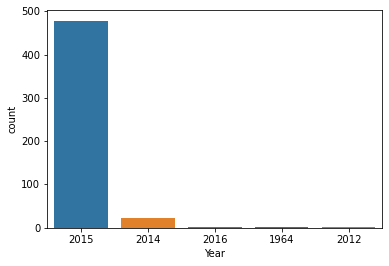

In [10]:
g = sns.countplot(data = fandango, x = 'FILM_YEAR')
g.set_xlabel('Year')

---
**Top 10 movies with the highest number of votes:**

In [11]:
fandango.sort_values(by=['VOTES'], ascending = False)[:10]

,FILM,STARS,RATING,VOTES,FILM_YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


---
---
### Data Cleaning (Fandango Dataframe)

---

**Counting the zero-values in the votes column:**

In [27]:
fandango[fandango['VOTES'] == 0]['VOTES'].count()

69

---
**Creating new DataFrame of only reviewed films by removing any films that have zero votes.**

    'votes_fandango' dataframe will not have entries where the votes column had zero-values

In [28]:
votes_fandango = fandango[fandango['VOTES'] != 0]
votes_fandango.count()

FILM         435
STARS        435
RATING       435
VOTES        435
FILM_YEAR    435
dtype: int64

In [167]:
# (Total Records with values in votes) + (Total Zero Votes)
435 + 69

504

In [15]:
votes_fandango.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'FILM_YEAR'], dtype='object')

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user.**

    KDE plot: Displaying the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING)

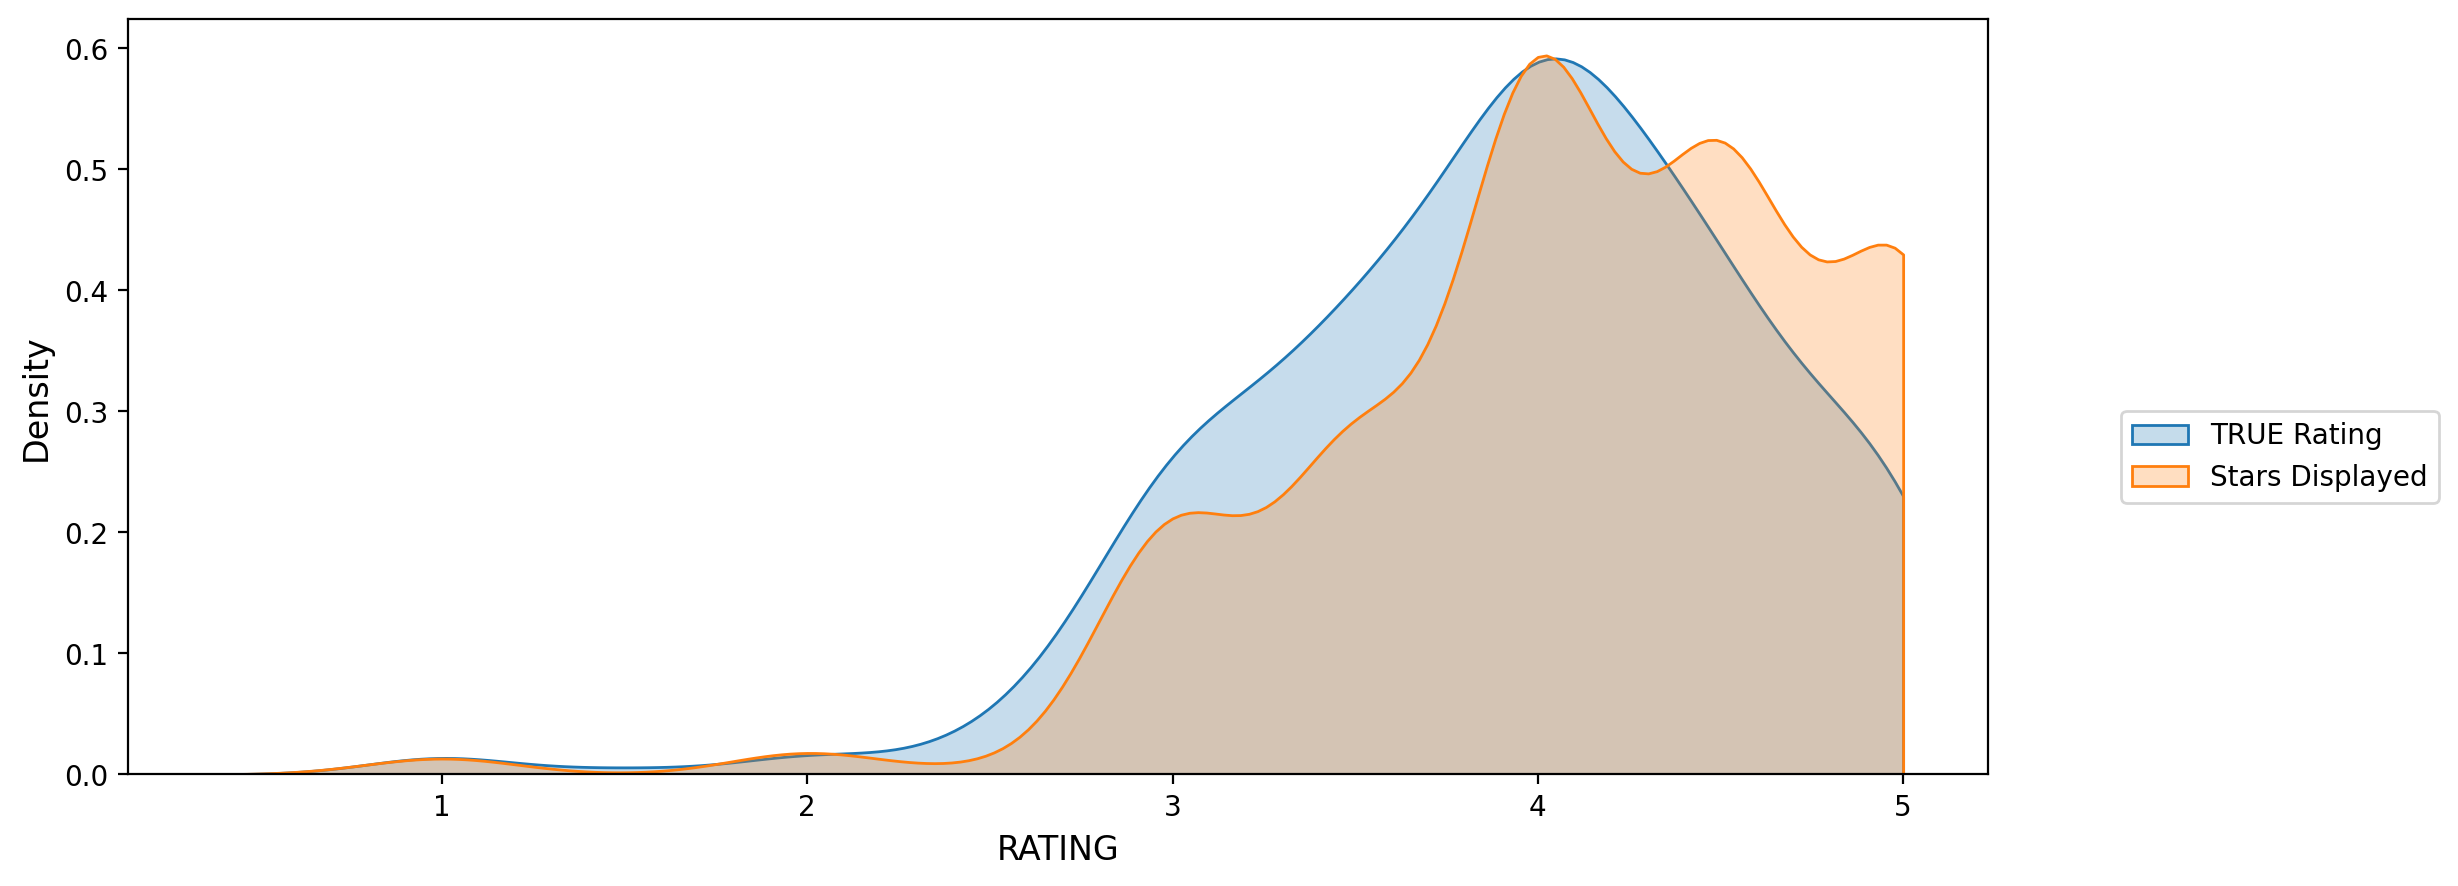

In [34]:
plt.figure(figsize = (12,5), dpi = 200)

kde_plot = sns.kdeplot(data = votes_fandango, x = 'RATING', shade = True, label = 'TRUE Rating', clip = [0,5]) 
kde_plot = sns.kdeplot(data = votes_fandango, x = 'STARS', shade = True, label = 'Stars Displayed', clip = [0,5]) 

kde_plot.set_xlabel('RATING', fontsize ='large')
kde_plot.set_ylabel('Density' ,fontsize ='large')


kde_plot.legend(bbox_to_anchor = (1.25, 0.5))

    For the most part, we can see that Fandango displays movie ratings higher than the stars displayed

**Quantifying the discrepancy, as shown above:** 
        
        Difference between STARS displayed versus true RATING

In [33]:
votes_fandango['STARS-DIFF'] = (votes_fandango['STARS'] - votes_fandango['RATING']).round(decimals = 1)


/Users/Angelo/Desktop/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [35]:
votes_fandango

,FILM,STARS,RATING,VOTES,FILM_YEAR,STARS-DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


---
**Bar Graph to display the number of times a certain difference occurs:**

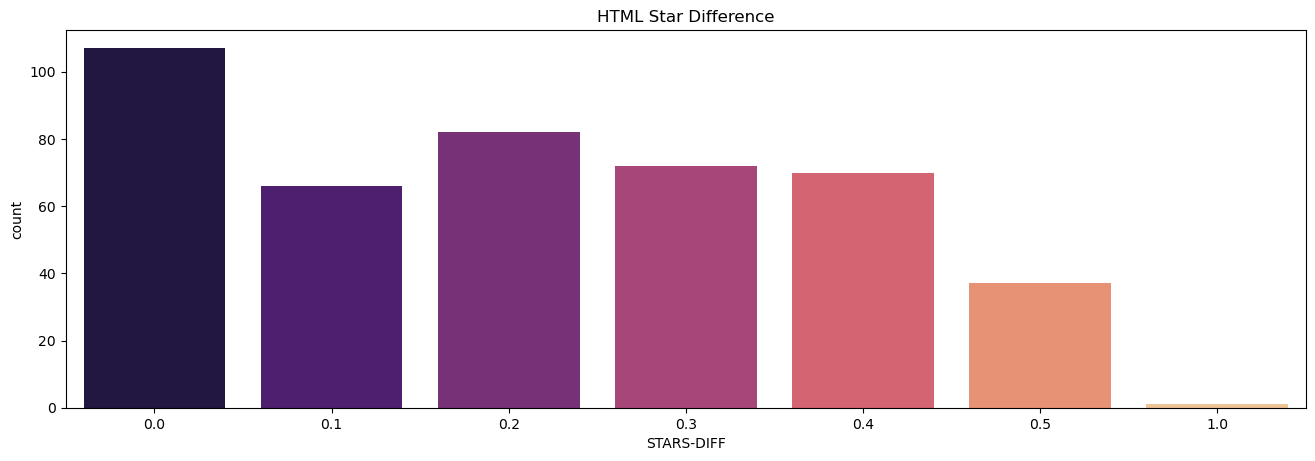

In [39]:
plt.figure(figsize = (16,5), dpi = 100)
diff = sns.countplot(data=votes_fandango, x = 'STARS-DIFF', palette = 'magma').set(title = 'HTML Star Difference')


#diff.set_ylim(bottom = 0, top = 100)  --> this works

**Movie(s) where star differential is 1:**

In [20]:
#CODE HERE
votes_fandango[votes_fandango['STARS-DIFF'] == 1]

,FILM,STARS,RATING,VOTES,FILM_YEAR,STARS-DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## ------------------------------------------------------------------------------------------------

---
## Comparison of Fandango Ratings to Other Sites

   
**Comparing the scores from Fandango to other movies sites and see how they compare.**

---

In [40]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [41]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [42]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [43]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


---
---
---
### Rotten Tomatoes

    RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 
    [RT Critic and RT USER, respectively.]

---

Text(0, 0.5, 'RottenTomatoes_User')

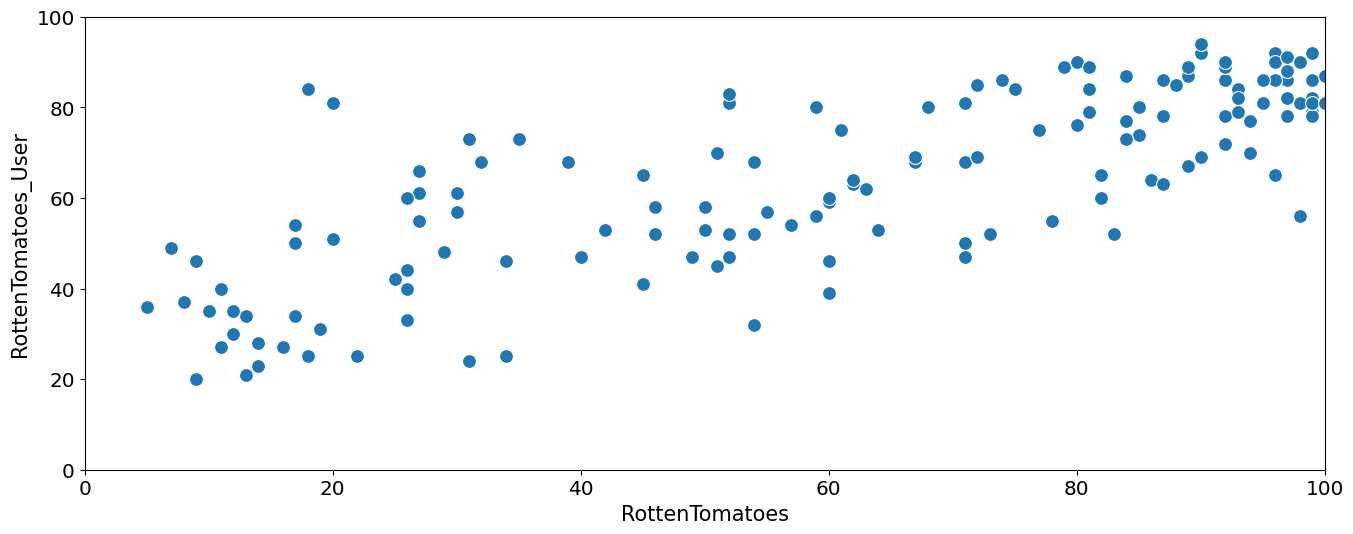

In [44]:
plt.figure(figsize = (16,6), dpi = 100)

rtn = sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User',s = 100)

rtn.set_xlim(left = 0, right = 100)
rtn.tick_params(axis = 'x', labelsize = "x-large" )
rtn.set_xlabel("RottenTomatoes", fontsize = 15)


rtn.set_yticks(ticks = [0,20,40,60,80,100])
rtn.tick_params(axis = 'y', labelsize = 'x-large')
rtn.set_ylabel("RottenTomatoes_User", fontsize = 15)

**Difference between Citics and User rating: (RottenTomatoes-RottenTomatoes_User)**

        Values closer to 0 means agreement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [45]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

**Mean Absolute Difference between RT scores and RT User scores**

    The average to the absolute difference between the critics rating versus the user rating.

In [48]:
rt_rating_diff = all_sites['Rotten_Diff']

rt_rating_diff.apply(lambda x: abs(x)).mean()

15.095890410958905

---
**The distribution of the differences between RT Critics Score and RT User Score:**

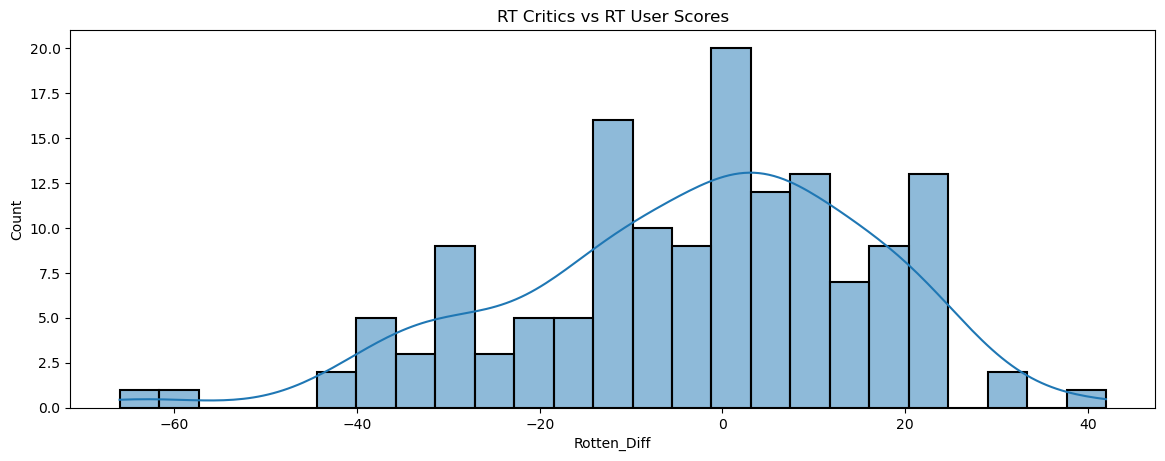

In [47]:
plt.figure(figsize = (14,5), dpi = 100)

sns.histplot(data = all_sites, x = 'Rotten_Diff', kde = True, bins = 25, lw = 1.5)

plt.title('RT Critics vs RT User Scores');

---
**Distribution showing the *absolute value* difference between RT Critics and RT Users on Rotten Tomatoes:**

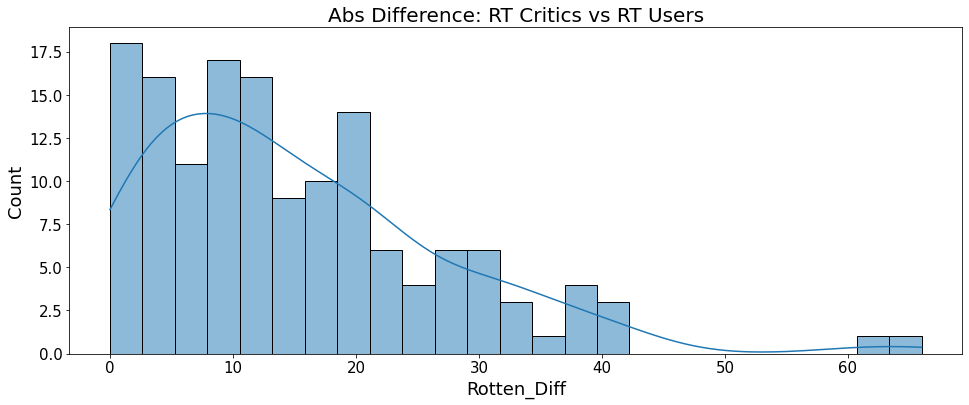

In [50]:
plt.figure(figsize = (16,6))

abs_rt = sns.histplot(data=all_sites, x = rt_rating_diff.apply(lambda x: abs(x)), kde = True, bins = 25 )

abs_rt.tick_params(axis = 'x', labelsize = 15)
abs_rt.set_xlabel('Rotten_Diff', fontsize =18 )

abs_rt.tick_params(axis = 'y', labelsize = 15)
abs_rt.set_ylabel('Count', fontsize =18 )

plt.title("Abs Difference: RT Critics vs RT Users", fontsize = 20);

---
**The top 5 movies RT users rated higher than RT critics on average:**

- Reminder: Negative difference = Users rated movie higher than critics, and vice versa

In [105]:
rt_diff_df = all_sites[all_sites['Rotten_Diff'].notnull()]
rt_diff_df.sort_values(by='Rotten_Diff', ascending = True)[['FILM', 'Rotten_Diff']][:5]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Alternate Method:**

*Note: This doesn't clean the data before, so it will load the whole table, even records who have a NAN value in the 'Rotten_Diff' Column*

In [52]:
all_sites.sort_values(by = ['Rotten_Diff'],ascending = True)[['FILM','Rotten_Diff']][:5]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Conversely, the top 5 movies RT critics scores higher than RT users on average:**


In [53]:
rt_diff_df.sort_values(by='Rotten_Diff', ascending = False)[['FILM', 'Rotten_Diff']][:5]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


---
---
---
## MetaCritic 

Metacritic also shows an average user rating versus their official displayed rating.

---

**Scatterplot of the Metacritic Rating versus the Metacritic User rating:**

(0.0, 10.0)

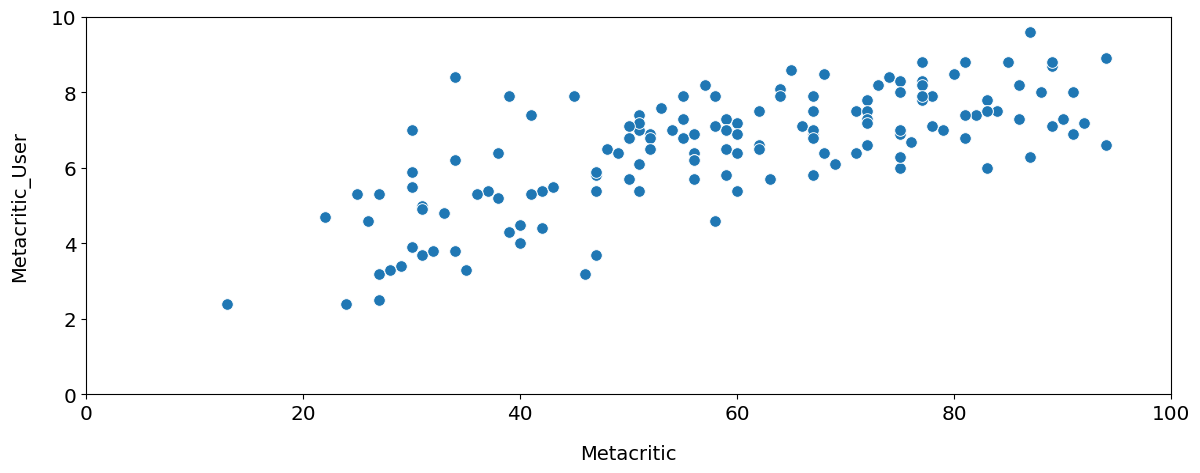

In [54]:
#'Metacritic_User'  = Users
#'Metacritic' = Professional Critics
#'Metacritic_user_vote_count' 

plt.figure(figsize = (14,5), dpi = 100)

meta_scatter = sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User', s = 70)

meta_scatter.set_xlabel(xlabel = 'Metacritic', fontsize = 14,labelpad = 15)
meta_scatter.tick_params(axis = 'x', labelsize = 'x-large')
meta_scatter.set_xlim(0,100)

meta_scatter.set_ylabel(ylabel = 'Metacritic_User', fontsize = 14, labelpad = 15)
meta_scatter.tick_params(axis = 'y', labelsize = 'x-large')
meta_scatter.set_ylim(0, 10)

#meta_scatter.tightlayout()

---
---
---
## IMDB

    Note: Both Metacritic and IMDB report back vote counts


---

**Scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB:**



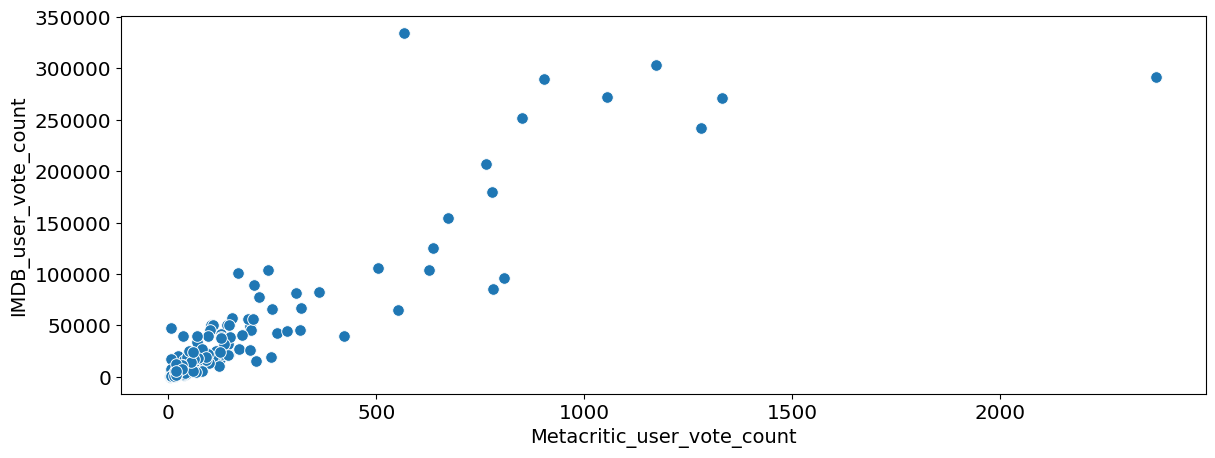

In [57]:
#'IMDB_user_vote_count'
# 'IMDB'

plt.figure(figsize = (14,5), dpi = 100)

user_vote_counts = sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count', s = 70)

user_vote_counts.set_xlabel('Metacritic_user_vote_count', fontsize = 14)
user_vote_counts.tick_params(axis = 'x', labelsize = 'x-large')

user_vote_counts.set_ylabel('IMDB_user_vote_count', fontsize = 14)
user_vote_counts.tick_params(axis = 'y', labelsize = 'x-large')




    Two outliers here: The movie with the highest vote count on IMDB only has about 500 Metacritic ratings
    
    

---
**Finding the highest voted IMDB movie:**

In [58]:
all_sites.sort_values(by = 'IMDB_user_vote_count', ascending = False)[0:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Finding the movie highest Metacritic User Vote count:**

In [59]:
all_sites.sort_values(by = 'Metacritic_user_vote_count', ascending = False)[0:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


---
---
---
---
---
## Fandago Scores vs. All Sites

**Analysis on whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales:**

---

**Merging the *Fandango Table* with the *All_Sites table* :**

- Using an inner join: not all movies in fandango table is in the all_sites table. Only looking at movies in both tables

In [61]:
merge_fandango_all_sites = pd.merge(fandango, all_sites, how = 'inner', on = 'FILM')
merge_fandango_all_sites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   FILM_YEAR                   145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [63]:
merge_fandango_all_sites.head()

,FILM,STARS,RATING,VOTES,FILM_YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


---
---
### Normalize columns to Fandango rating system (STARS and RATINGS 0-5)

NOTE: Since RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.


Formula to convert ratings:
    
    100/20 = 5 (Dividing by 20, if rating system is out of 100)
    10/2 = 5 (Dividing by 2, if rating system if out of 10)

-  'Metacritic', 'RottenTomatoes_User' ,'RottenTomatoes' columns: rating is out of 100
- ' Metacritic_User', 'IMDB' columns: rating out of 10

In [64]:
merge_fandango_all_sites['RT_Norm'] = round(merge_fandango_all_sites['RottenTomatoes'].apply(lambda x: x/20),1) 
#Apply on the 1 axis, column-axis

In [65]:
merge_fandango_all_sites['RTUser_Norm'] = round(merge_fandango_all_sites['RottenTomatoes_User'].apply(lambda x: x/20), 1)

In [66]:
merge_fandango_all_sites['Meta_Norm'] = round(merge_fandango_all_sites['Metacritic'].apply(lambda x: x/20), 1)

In [67]:
merge_fandango_all_sites['MetaUser_Norm'] = round(merge_fandango_all_sites['Metacritic_User'].apply(lambda x: x/2),1)

In [68]:
merge_fandango_all_sites['IMDB_Norm'] = round(merge_fandango_all_sites['IMDB'].apply(lambda x: x/2),1)

In [70]:
merge_fandango_all_sites[:5]

,FILM,STARS,RATING,VOTES,FILM_YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTUser_Norm,Meta_Norm,MetaUser_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


---
- norm_scores DataFrame contains the normalized ratings columns, including both STARS and RATING from the 
    Fandango table.

In [73]:
normalized_df = merge_fandango_all_sites[['STARS', 'RATING','RT_Norm', 'RTUser_Norm', 'Meta_Norm', 'MetaUser_Norm','IMDB_Norm']].copy() 

In [74]:
normalized_df.head()

,STARS,RATING,RT_Norm,RTUser_Norm,Meta_Norm,MetaUser_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


---
### Comparing Distribution of Scores Across Sites


- As shown earlier, we already know Fandango pushs displayed RATING higher than STARS, but are the movie ratings themselves higher than average?

---


**Distributions of normalized ratings across all sites.**




In [76]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
move_legend(ax, "upper left")

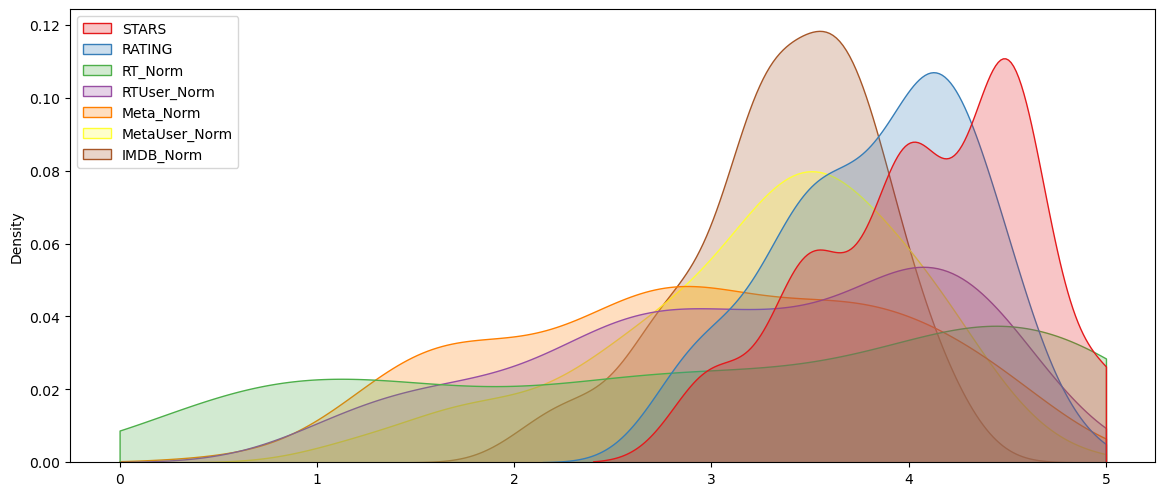

In [77]:
fig, ax = plt.subplots(figsize = (14,6), dpi = 100)

#plt.figure(figsize = (14,6), dpi = 100)

norm_graph = sns.kdeplot(data = normalized_df, shade = True, clip = [0,5], palette = 'Set1')

move_legend(ax, "upper left")

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution.**



---
**KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango:**

<AxesSubplot:ylabel='Density'>

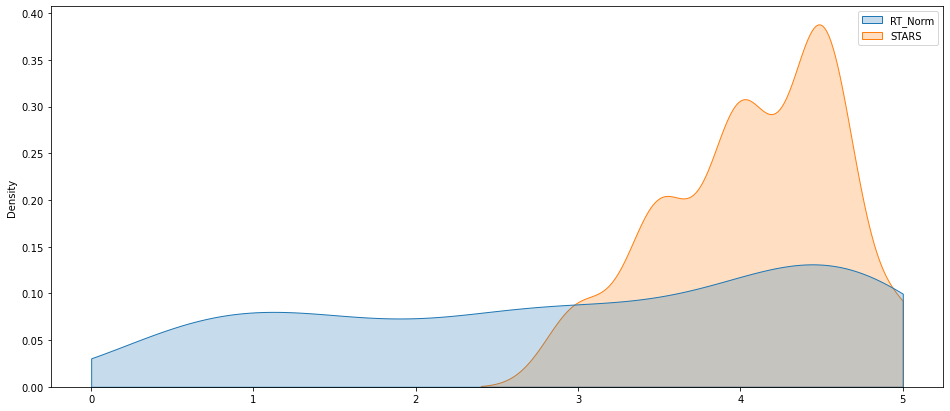

In [79]:
plt.figure(figsize = (16,7))

#Works too, without legend though
#rt_vs_stars = sns.kdeplot(data = normalized_df, x = 'RT_Norm', shade = True, clip = [0,5] )
#rt_vs_stars = sns.kdeplot(data = normalized_df, x = 'STARS', shade = True, clip = [0,5] )

#Alernate:
sns.kdeplot(data = normalized_df[['RT_Norm','STARS']], shade = True, clip = [0,5] )


---
**Histplot comparing all normalized scores:**

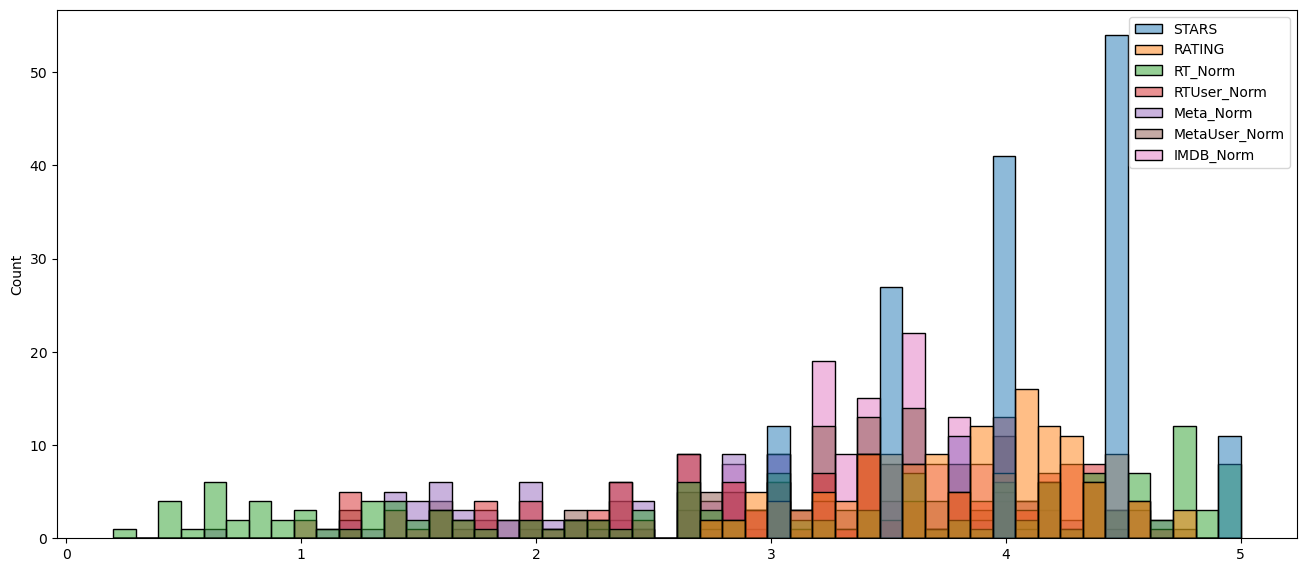

In [80]:
plt.figure(figsize = (16,7), dpi = 100)

norm_hist = sns.histplot(data = normalized_df, bins = 50)

#norm_hist.set_xlim(0,6)

---
### Worse movies rating across all sites:

    Clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies are clustered together versus poorly rated movies. 

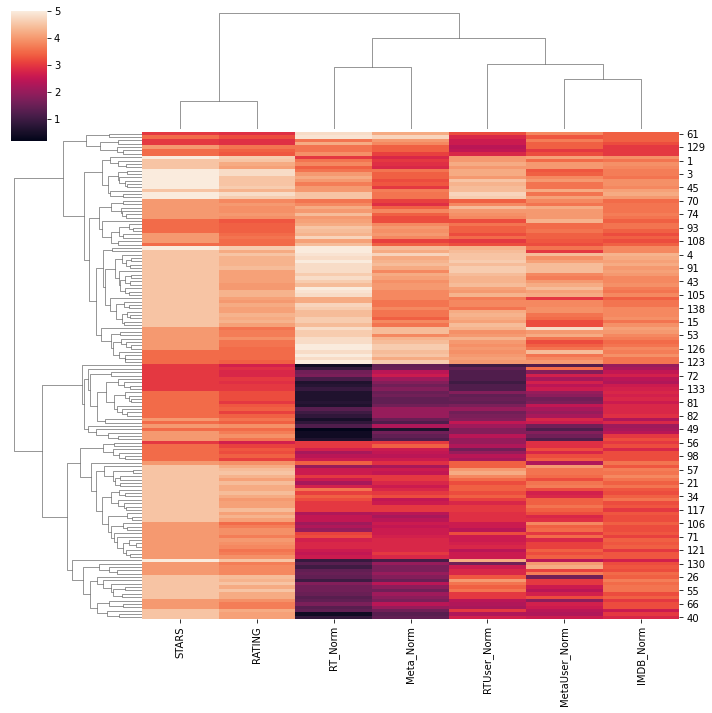

In [82]:
sns.clustermap(data = normalized_df)

--------------------------------------------------------------------

**It's evident that Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating**


**Examining the top 10 worst movies: Since Rotten Tomatoes Critics rating has the most uniform distribution, we use their top 10 lowest rated movies.**
     
- Examining the normalized scores across all platforms for the RT 10 worst movies

In [84]:
normalized_df2 = merge_fandango_all_sites[['STARS', 'RATING','RT_Norm', 'RTUser_Norm', 'Meta_Norm', 'MetaUser_Norm','IMDB_Norm', 'FILM']]
normalized_df2.sort_values(by = 'RT_Norm', ascending = True)[:10]

,STARS,RATING,RT_Norm,RTUser_Norm,Meta_Norm,MetaUser_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


---
---
### **Distribution of ratings across all sites for the top 10 worst RT movies:**

In [96]:
top_10_worst_RT

,STARS,RATING,RT_Norm,RTUser_Norm,Meta_Norm,MetaUser_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Taken 3 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Taken 3 (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Taken 3 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Taken 3 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,Taken 3 (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,Taken 3 (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,Taken 3 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Taken 3 (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Taken 3 (2015)


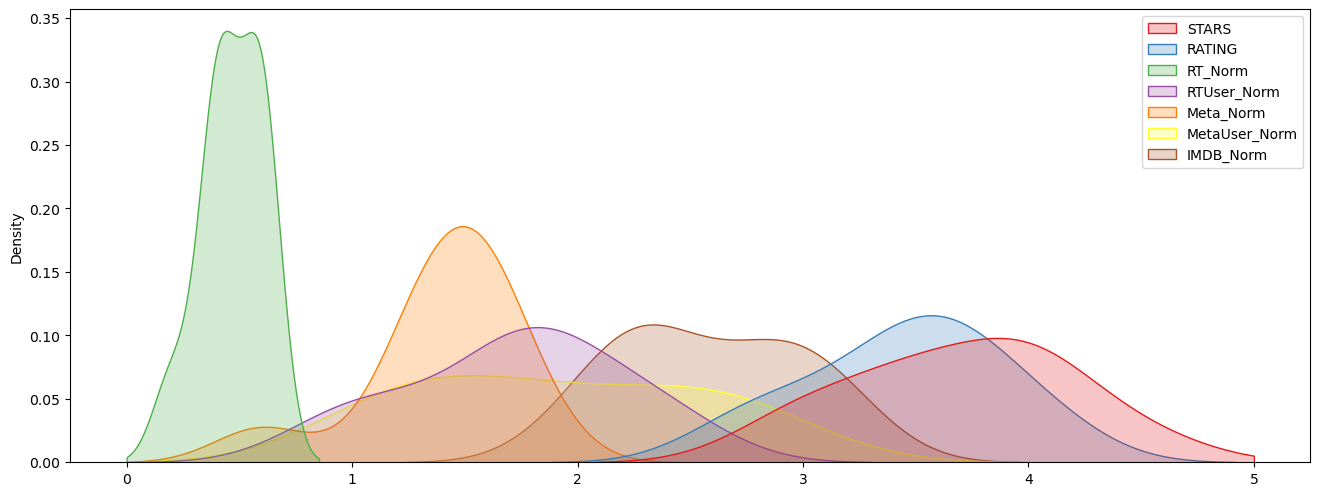

In [97]:
top_10_worst_RT = normalized_df2.sort_values(by = 'RT_Norm', ascending = True)[:10]


plt.figure(figsize = (16,6) , dpi = 100)

norm_worst_kde = sns.kdeplot(data = top_10_worst_RT, shade = True, clip = [0,5], palette = 'Set1')
#norm_worst_kde.set_ylim(0.00, 0.35)

---
----

### **Conclusion: Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, (Taken 3). Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms.**

In [101]:
top_10_worst_RT.iloc[1]

STARS                       4.5
RATING                      4.1
RT_Norm                     0.4
RTUser_Norm                 2.3
Meta_Norm                   1.3
MetaUser_Norm               2.3
IMDB_Norm                   3.0
FILM             Taken 3 (2015)
Name: 25, dtype: object

In [102]:
0.4+2.3+1.3+2.3+3

9.3

In [103]:
9.3/5

1.86

----